# Naive Bayes Classification

## Questions
Implement Naive Bayes classifier upon the Iris data set.
Apart from this, perform the following:
1. Statistically analyze the data-set. Visualize the distribution of the columns containing quantitative values using box-plots.
2. Create at least three combinations of feature-sets from the original feature-set. Evaluate the accuracy of the Naive Bayes Classifier upon each feature-set. Visualize the comparison of accuracy using suitable plots.
3. Does removal of features improve accuracy? If yes, then how? Give one practical application where removal of features might be required? (This is subjective question. Provide your answer in the text cell of your notebook.)

# Imports

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Dataset import

In [28]:
irisData = load_iris()
x, y = irisData.data, irisData.target
print(irisData.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
x_df=pd.DataFrame(data=x,columns=irisData.feature_names)
y_df=pd.DataFrame(data=y,columns=["target"])

# Boxplot

<Axes: >

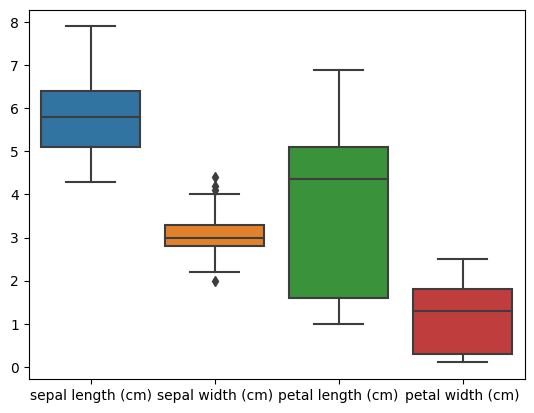

In [30]:
import seaborn as sns
sns.boxplot(data=x_df.iloc[:,:4])

# Accuracy using subset of the iris dataset

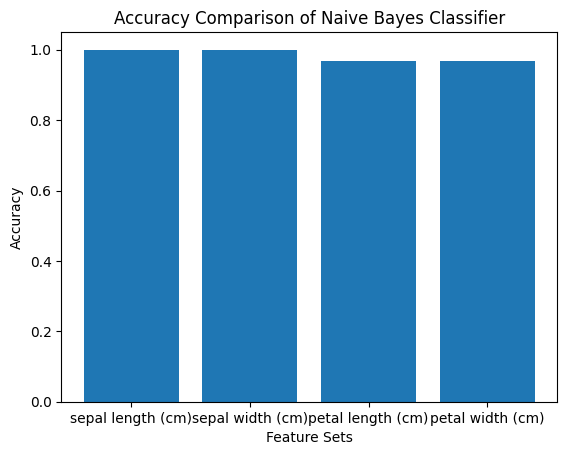

In [32]:
accuracies = []

for feature in irisData.feature_names:
    # Select the features from the dataset
    x_subset = x_df.drop([feature], axis=1)
    
    # Split the dataset into train and test sets
    x_subset = StandardScaler().fit_transform(x_subset)
    x_train, x_test, y_train, y_test = train_test_split(x_subset, y, test_size=0.2, random_state=42)
    
    # Create and train the Naive Bayes classifier
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(x_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualize the comparison of accuracy using a bar plot
import matplotlib.pyplot as plt

plt.bar(range(len(irisData.feature_names)), accuracies)
plt.xticks(range(len(irisData.feature_names)), irisData.feature_names)
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Naive Bayes Classifier')
plt.show()

# 3. Does removal of features improve accuracy? If yes, then how?  Give one practical application where removal of features might be required?

### Answer:

Yes removal of features improve accuracy.

The removal of features can improve accuracy in some cases, especially when dealing with irrelevant or redundant features. By removing such features, the classifier can focus on the most informative ones, reducing the potential noise and overfitting.

RealLife example: 
If we create the marksheet database there all information will not be required such as his/her library card details, blood group etc.
In this case if we reduce that dimensions it will definately give some benifit.